In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Data Collection and Processing

In [2]:
#Load the dataset
df=pd.read_csv(r"C:\Users\anike\Downloads\Dataset .csv")
df

#Display the first few rows of the dataframe
df.head()

# Check the structure and data types
df.info()

# Summary statistics
df.describe()

# check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Level 1 Tasks

#Task 1 :Top Cuisines 

In [4]:
# Determine the top three most common cuisines in the dataset
top_cuisines=df['Cuisines'].value_counts().head(3)
top_cuisines

# Calculate the percentage of restaurants that serve each of the top cuisines
total_restaurants = len(df)
cuisine_percentages = (top_cuisines / total_restaurants) * 100

print(top_cuisines)
print(cuisine_percentages)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64
Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


#Task 2:City Analysis

In [5]:
# Identify the city with the highest number of restaurants in the dataset
top_City=df['City'].value_counts().idxmax()
top_City

# Calculate the average rating for restaurants in each city
average_ratings_by_city = df.groupby('City')['Aggregate rating'].mean()

# Determine the city with the highest average rating
city_highest_avg_rating = average_ratings_by_city.idxmax()

print("City with highest number of restaurants:", top_City)
print("City with highest average rating:", city_highest_avg_rating)

City with highest number of restaurants: New Delhi
City with highest average rating: Inner City


#Task 3:Price Range Distribution

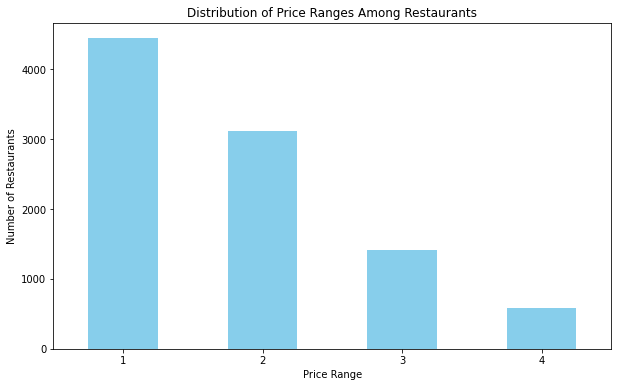

In [8]:
# Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants
df['Price range'].unique()
plt.figure(figsize=(10, 6))
df['Price range'].value_counts().sort_index().plot(kind='bar', color='yellow')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()

In [9]:
# Calculate the count of each price range
price_range_counts = df['Price range'].value_counts()

# Calculate the percentage of restaurants in each price range category
total_restaurants = len(df)
price_range_percentages = (price_range_counts / total_restaurants) * 100

print("Price Range Percentages:\n", price_range_percentages)

Price Range Percentages:
 Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


#Task 4:Online Delivery

In [10]:
#Determine the percentage of restaurants that offer online delivery
total_restaurants = len(df)
online_delivery_restaurants = df[df['Has Online delivery'] == 'Yes'].shape[0]

percentage_online_delivery = (online_delivery_restaurants / total_restaurants) * 100
print(f"Percentage of restaurants that offer online delivery: {percentage_online_delivery:.2f}%")


#Compare the average ratings of restaurants with and without online delivery
average_rating_online_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
average_rating_no_online_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

print(f"Average rating of restaurants with online delivery: {average_rating_online_delivery:.2f}")
print(f"Average rating of restaurants without online delivery: {average_rating_no_online_delivery:.2f}")

Percentage of restaurants that offer online delivery: 25.66%
Average rating of restaurants with online delivery: 3.25
Average rating of restaurants without online delivery: 2.47
